In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [21]:
df_data = pd.read_csv('../data/

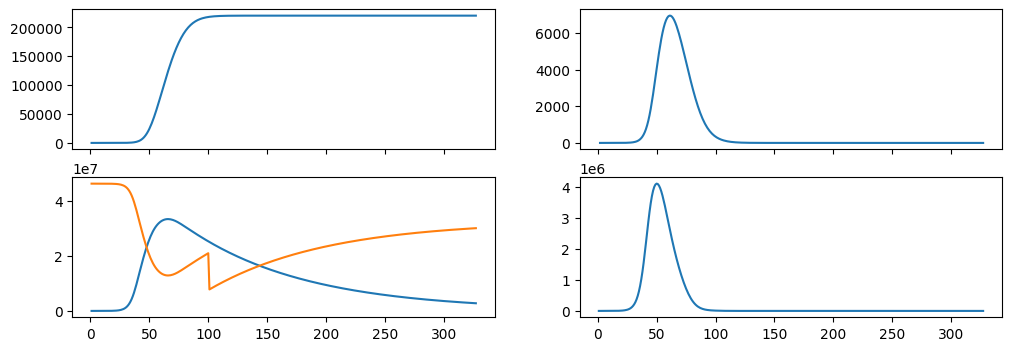

In [25]:
infected_compartments = ['E', 'A', 'I', 'PH', 'PD', 'HR', 'HD', 'R', 'D']
prevalence = xa_agg.loc[:, :, infected_compartments].sum("epi_states").to_pandas()

compartment = ['I']
infected = xa_agg.loc[:, :, compartment].sum("epi_states").to_pandas()

death_compartments    = ['D']
defunctions = xa_agg.loc[:, :, death_compartments].sum("epi_states").to_pandas()

compartment    = ['S']
suceptibles = xa_agg.loc[:, :, compartment].sum("epi_states").to_pandas()

prevalence = prevalence.sum()
suceptibles = suceptibles.sum()
infected = infected.sum()
defunctions = defunctions.sum()

fig, axes = plt.subplots(2,2,figsize=(12,4), sharex=True)
axes[0,0].plot(defunctions)
axes[0,1].plot(defunctions.diff())

axes[1,0].plot(prevalence)
axes[1,0].plot(suceptibles)

axes[1,1].plot(infected)

In [28]:
import pandas as pd

df_data = pd.read_csv('../data/casos_hosp_uci_def_sexo_edad_provres.csv')

In [5]:
import xarray as xa

ds = xa.load_dataset('../test/output/compartments_full.nc')
ds

<xarray.Dataset>
Dimensions:     (epi_states: 10, V: 2, T: 22, M: 2850, G: 3)
Coordinates:
  * G           (G) object 'Y' 'M' 'O'
  * T           (T) object '2020-02-09' '2020-02-10' ... '2020-03-01'
  * M           (M) object '01001_AM' '01002' '01010_AM' ... '5200107' '5200108'
  * epi_states  (epi_states) object 'S' 'E' 'A' 'I' 'PH' 'PD' 'HR' 'HD' 'R' 'D'
  * V           (V) object 'NV' 'V'
Data variables:
    data        (epi_states, V, T, M, G) float64 1.065e+03 4.747e+03 ... 0.0 0.0